#### Análise de Séries Temporais

#### Conteúdo - Bases e Notebook da aula

#### Importação de pacotes, bibliotecas e funções (def)

In [3]:
# Importar biblioteca completa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# Importar função especifica de um módulo
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsforecast import StatsForecast
from statsforecast.models import Naive

In [4]:
# Criando def para calcular o wmape
def wmape(y_true, y_pred):
    return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

#### Tendencia, Sazonalidade e Residuo


Em análise de séries temporais, entender os componentes de **tendência, sazonalidade e resíduo** é fundamental para interpretar e prever o comportamento de dados ao longo do tempo. Uma série temporal é, essencialmente, um conjunto de dados coletados em intervalos de tempo sequenciais. A decomposição desses dados em seus componentes principais nos ajuda a compreender os padrões subjacentes.

Imagine o total de vendas mensais de uma sorveteria. Esse dado bruto, ao longo de vários anos, pode ser decomposto nos seguintes elementos:

### 1. Tendência ($T_t$)

A tendência representa o comportamento de longo prazo da série temporal. É a direção geral para a qual os dados estão se movendo, ignorando as flutuações de curto prazo. Uma tendência pode ser:

* **Crescente:** Quando os valores da série aumentam ao longo do tempo. Por exemplo, o aumento gradual das vendas de uma empresa ano após ano devido ao crescimento do mercado.
* **Decrescente:** Quando os valores da série diminuem ao longo do tempo. Um exemplo seria a diminuição do número de cartas enviadas pelos correios com a popularização do e-mail.
* **Estável (ou Horizontal):** Quando não há uma direção clara de aumento ou queda a longo prazo.

É importante notar que a tendência não precisa ser linear. Ela pode mudar de direção ao longo do tempo, como uma tendência de crescimento que se torna estável e depois decrescente.

> **Exemplo na sorveteria:** Uma tendência de crescimento nas vendas anuais pode indicar que a marca está se tornando mais popular ou que a população local está aumentando.

### 2. Sazonalidade ($S_t$)

A sazonalidade refere-se a padrões que se repetem em intervalos de tempo fixos e conhecidos. Essas flutuações são previsíveis e estão, geralmente, associadas a fatores sazonais, como o clima, feriados ou estações do ano. A sazonalidade pode ser:

* **Anual:** Padrões que se repetem todos os anos (ex: vendas de Natal).
* **Mensal:** Padrões que ocorrem em determinados dias do mês.
* **Semanal:** Padrões que se repetem ao longo da semana (ex: maior movimento em restaurantes nos fins de semana).
* **Diária:** Padrões que ocorrem em certas horas do dia (ex: picos de trânsito no horário de pico).

A principal característica da sazonalidade é que o período de repetição é fixo e conhecido.

> **Exemplo na sorveteria:** As vendas de sorvete são muito maiores durante o verão (dezembro a março no Hemisfério Sul) e caem drasticamente no inverno. Esse padrão se repete todos os anos, caracterizando a sazonalidade.

### 3. Resíduo ($R_t$ ou $\epsilon_t$)

O resíduo, também conhecido como ruído, erro ou componente aleatório, é o que sobra na série temporal após a remoção da tendência e da sazonalidade. Ele representa as flutuações irregulares e imprevisíveis nos dados. O resíduo pode ser causado por:

* Eventos inesperados e não recorrentes (ex: uma promoção relâmpago que aumentou as vendas em um dia específico).
* Variações aleatórias e naturais nos dados.
* Erros de medição.

Em um bom modelo de série temporal, o resíduo deve ser aleatório, sem nenhum padrão discernível, com média zero e variância constante. Se houver padrões no resíduo, isso indica que o modelo não capturou todas as informações importantes dos dados.

> **Exemplo na sorveteria:** Um aumento repentino nas vendas em um dia de outono, que não pode ser explicado pela tendência ou sazonalidade, seria parte do resíduo. Talvez tenha sido um dia atipicamente quente e ensolarado.

### Decomposição da Série Temporal

A relação entre esses três componentes pode ser modelada de duas formas principais:

* **Modelo Aditivo:**
    $$
    Y_t = T_t + S_t + R_t
    $$
    Neste modelo, a magnitude da sazonalidade e do resíduo não depende do nível da tendência. É adequado para séries em que as flutuações sazonais são relativamente constantes ao longo do tempo.

* **Modelo Multiplicativo:**
    $$
    Y_t = T_t \times S_t \times R_t
    $$
    Aqui, a magnitude da sazonalidade e do resíduo é proporcional ao nível da tendência. Ou seja, as flutuações sazonais aumentam ou diminuem conforme a tendência sobe ou desce. Este modelo é frequentemente mais realista para séries econômicas e de vendas.

A análise desses componentes é crucial para a construção de modelos de previsão precisos, pois permite que cada padrão seja modelado separadamente, levando a uma melhor compreensão do fenômeno observado.

#### Aula 1 - O Problema de Time Series

In [5]:
# Atribuir em uma variavel o link do conteudo
df_path = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"

In [6]:
# Gerar o data frame 
df = pd.read_csv(df_path)

# Ver o data frame
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [7]:
# Ver as info do data frame 
# O campo DATE esta no formato object e precisa ser data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [8]:
# Criar uma nova coluna no formato de data e usar como index

df.index = pd.to_datetime(df.DATE, format = "%m-%d-%Y")

In [9]:
# Dropar a coluna date

df.drop("DATE", inplace=True, axis=1)

In [10]:
# Ver como ficou os dados 

df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [11]:
df.loc['1985-05-01']

Value    55.3151
Name: 1985-05-01 00:00:00, dtype: float64

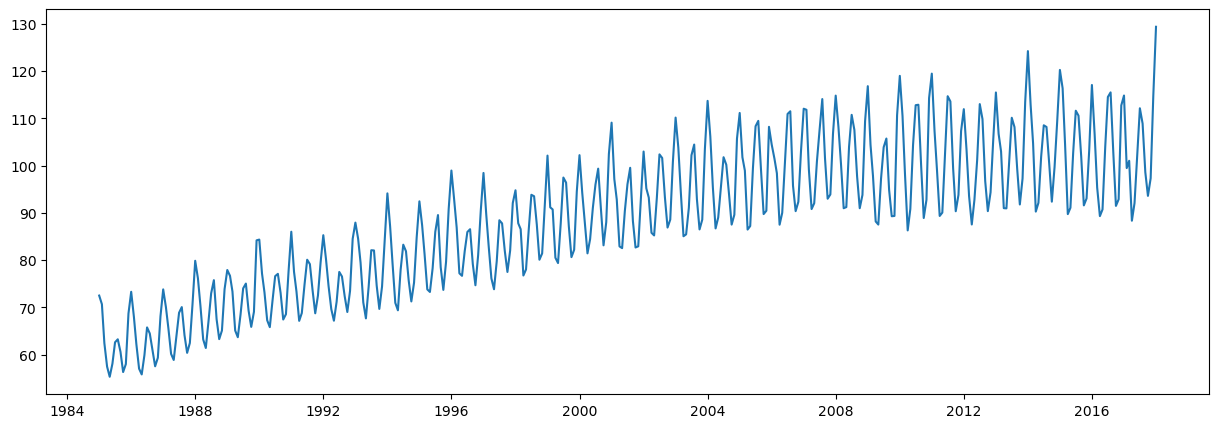

In [12]:
# Plotar o grafico 

plt.figure(figsize=(15,5))
plt.plot(df.index,df.Value)
plt.show()

In [13]:
# Realizar a decomposição da seria temporal -->  tendência (trend), sazonalidade (seasonal) e resíduo (resid)
# Analisar a série temporal e separar os componentes

resultados = seasonal_decompose(df)

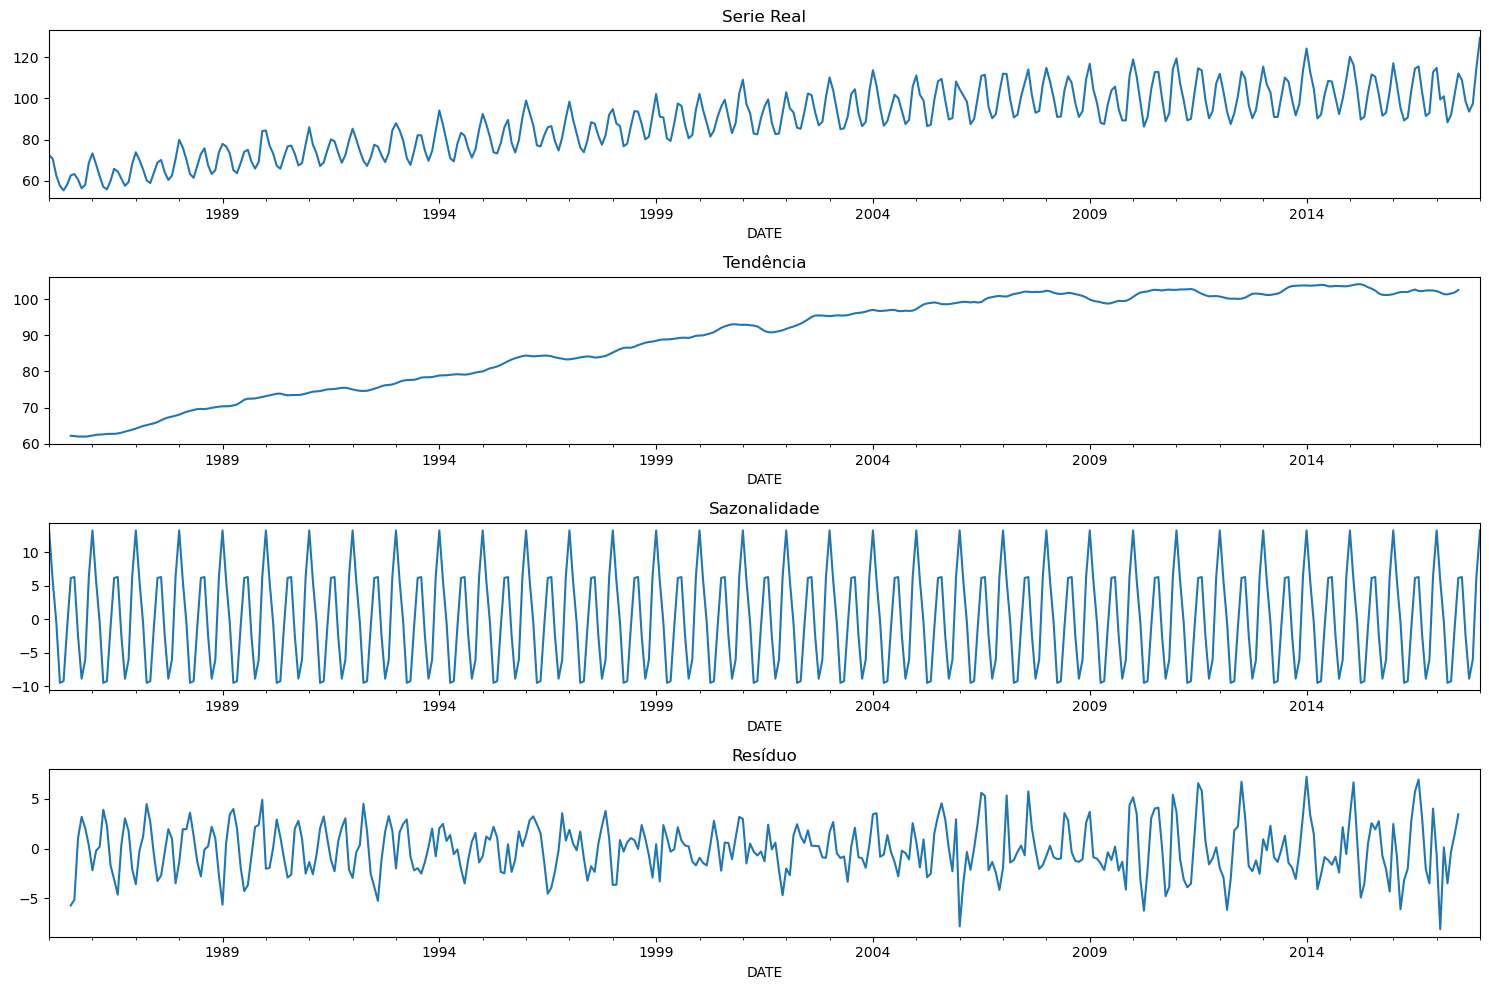

In [14]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,10))

resultados.observed.plot(ax=ax1) # Plota o dado original
ax1.set_title("Serie Real")

resultados.trend.plot(ax=ax2) # Ver a tendencia
ax2.set_title("Tendência")

resultados.seasonal.plot(ax=ax3) # Ver a sazonalidade
ax3.set_title("Sazonalidade")

resultados.resid.plot(ax=ax4) # Ver o resíduo
ax4.set_title("Resíduo")

plt.tight_layout()
plt.show()

In [15]:
# Estacionária ou não estacionária

# ADF - Augmented Dickey Fuller

# H0 - Hipótese Nula (não é estacionária)
# H1 - Hipótese Alternativa (rejeição da hipótese nula)

# p -value = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [16]:
"""

Entendendo o Teste Augmented Dickey-Fuller (ADF) com Base no seu Código
O código apresentado realiza um teste estatístico fundamental em análise de séries temporais: o Teste Augmented Dickey-Fuller (ADF). A função adfuller, proveniente da biblioteca statsmodels do Python, 
é a ferramenta central para essa análise. O objetivo principal do teste ADF é verificar se uma série temporal é estacionária.

Uma série temporal é dita estacionária quando suas propriedades estatísticas, como média, variância e autocorrelação, são constantes ao longo do tempo. Muitas modelagens de séries temporais, como o ARIMA, 
pressupõem que os dados sejam estacionários.

A Hipótese do Teste: Nula vs. Alternativa
Para entender os resultados, é crucial conhecer as hipóteses do teste ADF:

Hipótese Nula (H_0): A série temporal possui uma raiz unitária, o que significa que ela não é estacionária. Ela exibe uma tendência estocástica (aleatória).

Hipótese Alternativa (H_1): A série temporal não possui uma raiz unitária, indicando que ela é estacionária.

O objetivo é encontrar evidências estatísticas para rejeitar a hipótese nula em favor da hipótese alternativa.

Interpretando os Resultados Impressos
1. Teste Estatístico (ADF Statistic)
Este é o valor calculado pelo teste. Quanto mais negativo for esse número, maior a probabilidade de rejeitarmos a hipótese nula (ou seja, maior a chance da série ser estacionária).

2. P-Value (Valor-p)
O p-valor indica a probabilidade de obter um resultado igual ou mais extremo que o observado, assumindo que a hipótese nula é verdadeira. A regra geral é:

Se o p-valor for menor que um nível de significância (geralmente 0.05): Rejeitamos a hipótese nula. Isso significa que há fortes evidências de que a série é estacionária.

Se o p-valor for maior que o nível de significância: Não conseguimos rejeitar a hipótese nula. Isso sugere que a série provavelmente não é estacionária.

No seu resultado, o result[1] corresponde a este valor. Esta é, na maioria das vezes, a métrica mais direta para a tomada de decisão.

3. Valores Críticos
Os valores críticos são os valores do teste estatístico que definem a fronteira para rejeitar a hipótese nula em diferentes níveis de confiança (geralmente 1%, 5% e 10%). A interpretação é a seguinte:

Se o "Teste Estatístico" for mais negativo que um valor crítico: Podemos rejeitar a hipótese nula com o nível de confiança correspondente.

Por exemplo, se o seu "Teste Estatístico" for -4.5 e o valor crítico para 5% for -2.8, você pode rejeitar a hipótese nula com 95% de confiança, concluindo que a série é estacionária.

No seu resultado, o result[4] é um dicionário que contém esses valores críticos.

Conclusão Prática
Para determinar se a sua série temporal df.Value é estacionária com base no código fornecido, você deve seguir estes passos:

Olhe para o P-Value (result[1]):

Se for menor que 0.05, você tem um bom indicativo de que sua série é estacionária.

Compare o Teste Estatístico (result[0]) com os Valores Críticos (result[4]):

Se o "Teste Estatístico" for menor (mais negativo) que os valores críticos (por exemplo, o de 5%), isso reforça a conclusão de que a série é estacionária.

Se o teste indicar que a série não é estacionária, técnicas como a diferenciação são comumente aplicadas para transformá-la em uma série estacionária antes de prosseguir com a modelagem.

"""

# Pegando o Data Frame transformar um array e jogando em um variavel 
x = df.Value.values

result = adfuller(x)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value:: {result[1]}")
print(f"Valores críticos: ")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -2.2569903500472432
P-Value:: 0.18621469116586814
Valores críticos: 
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


In [17]:
# Definir o estilo
sns.set_style("darkgrid")

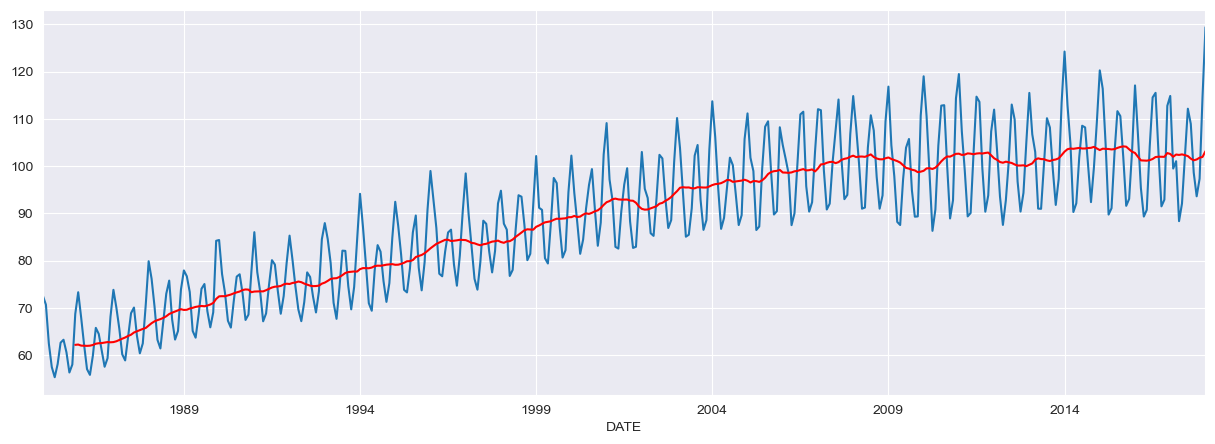

In [18]:
# Plotar grafico

ma = df.rolling(12).mean() # --> calcular a média movel usando uma janela de 12 periodos | Usado para calcular tendnecia

f,ax = plt.subplots(figsize=(15,5))
df.plot(ax = ax, legend = False)
ma.plot(ax = ax, legend = False, color = 'r')
plt.show()

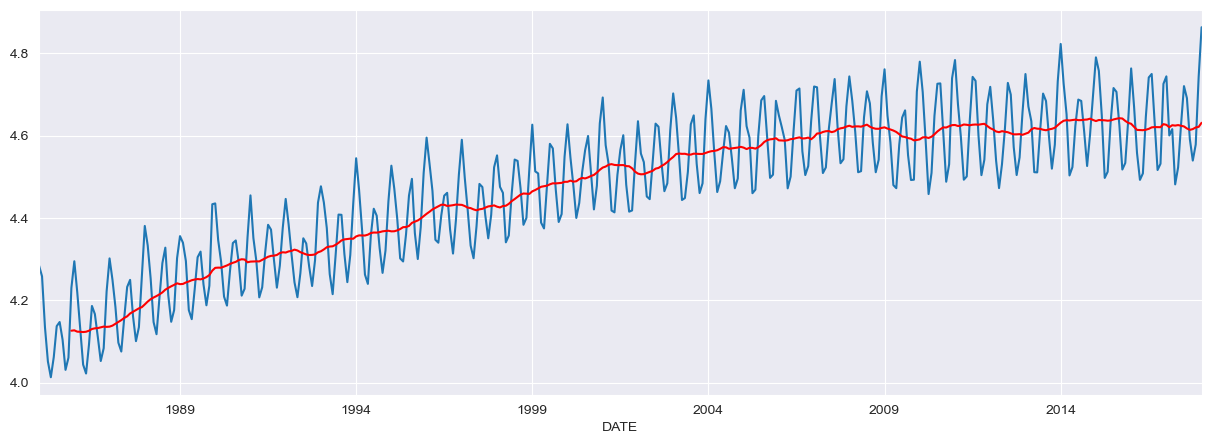

In [19]:
# Plotar na escala logaritima

df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

f,ax = plt.subplots(figsize=(15,5))
df_log.plot(ax = ax, legend = False)
ma_log.plot(ax = ax, legend = False, color = 'r')
plt.show()

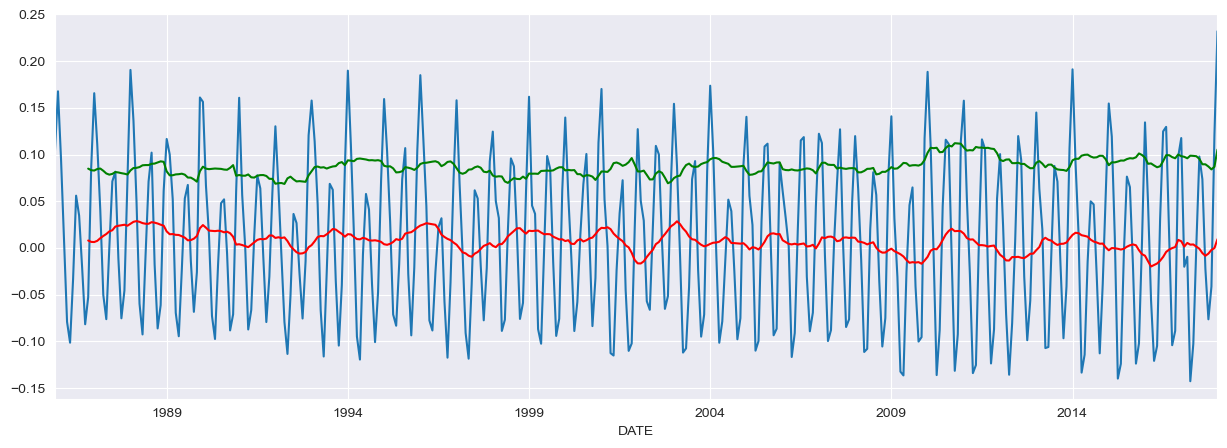

In [20]:
"""

Esse código é comum em análise de séries temporais, especialmente na etapa de pré-processamento de dados para tornar uma série estacionária.

Resumo Geral
O objetivo principal deste bloco de código é remover a tendência de uma série temporal e, em seguida, verificar se a remoção foi bem-sucedida. Isso é um passo fundamental para 
preparar os dados para modelos de previsão como o ARIMA, que exigem que a série seja estacionária (ou seja, que sua média e variância não mudem ao longo do tempo).

O que é Média Móvel (Moving Average) e Desvio Padrão (Standard Deviation)

Média Móvel (Moving Average)
Imagine que você está acompanhando o preço de uma ação que muda todo dia. O gráfico diário pode parecer muito "serrilhado", com muitos picos e vales que dificultam ver a direção geral do preço.

A Média Móvel é uma técnica para "suavizar" essa linha e revelar a tendência de fundo.

O que é?
É uma média calculada continuamente sobre um subconjunto de dados. Em vez de calcular a média de todos os seus dados de uma vez, você calcula a média dos últimos "N" pontos. 
Conforme um novo ponto de dado surge, o ponto mais antigo do subconjunto é descartado.

Analogia Simples:
Pense nas suas notas em provas. Em vez de olhar para a sua média geral do ano, você decide calcular a média das suas últimas 3 provas.

Provas 1, 2, 3: Média = (Nota1 + Nota2 + Nota3) / 3

Quando a Prova 4 sai, você descarta a Nota 1: Média = (Nota2 + Nota3 + Nota4) / 3

Quando a Prova 5 sai, você descarta a Nota 2: Média = (Nota3 + Nota4 + Nota5) / 3

Você está "movendo" a janela de cálculo.

Para que serve?

Suavizar Ruído: Ela elimina as flutuações de curto prazo (o "ruído") e deixa a visualização dos dados mais limpa.

Identificar Tendências: É a sua principal função em análise de séries temporais. Se a média móvel está subindo, a tendência geral é de alta. Se está caindo, a tendência é de baixa.

Base para Previsões: É um componente chave em muitos modelos de previsão, como o ARIMA.

Desvio Padrão (Standard Deviation)
Enquanto a média nos diz o "valor central" de um conjunto de dados, ela não nos conta nada sobre a dispersão dos dados.

O Desvio Padrão é a medida que nos diz o quão "espalhados" os dados estão em relação à média.

O que é?
É um número que quantifica a variação ou a dispersão de um conjunto de valores.

Desvio Padrão Baixo: Indica que os pontos de dados tendem a estar muito próximos da média. Os dados são consistentes e previsíveis.

Desvio Padrão Alto: Indica que os pontos de dados estão espalhados por uma ampla gama de valores. Os dados são voláteis e menos consistentes.

Analogia Simples:
Imagine dois jogadores de basquete, ambos com uma média de 20 pontos por jogo.

Jogador A (Desvio Padrão Baixo): Suas pontuações nos últimos jogos foram: 19, 20, 21, 20, 20. Ele é muito consistente. Você sabe que ele quase sempre fará cerca de 20 pontos.

Jogador B (Desvio Padrão Alto): Suas pontuações foram: 5, 40, 10, 35, 10. Ele também tem uma média de 20 pontos, mas é totalmente imprevisível. Ele é muito volátil.

O desvio padrão captura essa diferença de "consistência" que a média sozinha não consegue mostrar.

Para que serve?

Medir Volatilidade: Em finanças, um alto desvio padrão no preço de uma ação significa que ela é de alto risco (muito volátil).

Entender a Distribuição: Ajuda a entender se a maioria dos dados está agrupada perto da média ou se há muitos valores extremos.

Controle de Qualidade: Em uma fábrica, um baixo desvio padrão no tamanho de uma peça significa que o processo de produção é preciso e consistente.

"""

# Subtrair a média móvel dos dados originais e dessa forma remover a tendência da série. 
# Portanta, resta apenas apenas a sazonalidade e o resíduo (ruído aleatório), sem uma tendência de subida ou descida.

df_s = (df_log - ma_log).dropna() # --> subtrair a média móvel (ma_log) da série de dados original (df_log)
ma_s = df_s.rolling(12).mean()
std = df_s.rolling(12).std() 

f,ax = plt.subplots(figsize=(15,5))
df_s.plot(ax = ax, legend = False)
ma_s.plot(ax = ax, legend = False, color = 'r')
std.plot(ax = ax, legend = False, color = 'g')

plt.show()

In [21]:
# Gerar novamente o ADF

x_s = df_s.Value.values

result_s = adfuller(x_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value:: {result_s[1]}")
print(f"Valores críticos: ")
for key, value in result_s[4].items():
    print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -5.211586185365429
P-Value:: 8.325639759946488e-06
Valores críticos: 
	1%: -3.448147967010838
	5%: -2.8693833397824413
	10%: -2.5709483564645725


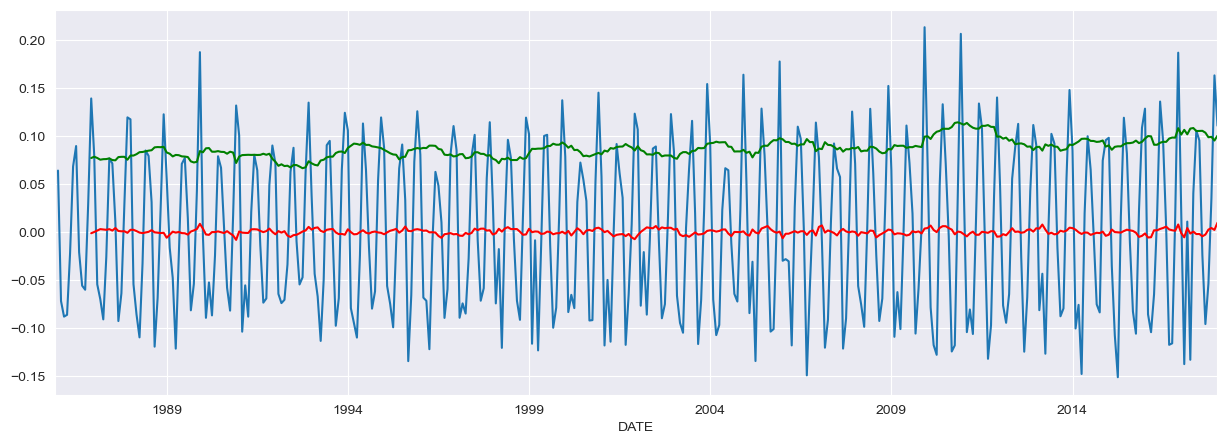

Teste ADF
Teste Estatístico: -7.651129568145196
P-Value:: 1.7881267354355122e-11
Valores críticos: 
	1%: -3.448294490928673
	5%: -2.869447722240253
	10%: -2.570982681065269


In [22]:
# Plotar novamente 

df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

f,ax = plt.subplots(figsize=(15,5))
df_diff.plot(ax = ax, legend = False)
ma_diff.plot(ax = ax, legend = False, color = 'r')
std_diff.plot(ax = ax, legend = False, color = 'g')
plt.show()

x_diff = df_diff.Value.dropna().values
result_diff = adfuller(x_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value:: {result_diff[1]}")
print(f"Valores críticos: ")
for key, value in result_diff[4].items():
    print(f"\t{key}: {value}")

#### Aula 2 - Utilizando Datas como Índice

#### Aula 3 - Bibliotecas Fundamentais em Time Series Problem


#### Aula 4 - Análise Exploratória de Dados (EDA)

In [23]:
"""

ARIMA --> AR + I + MA

AR = Autoregressivo
I = Integrado
MA =  Média Movel = Moving Average

O ARIMA pode ser definido na seguinte função 

A(x,y,z) --> Precisa do ACF E PACF 


"""

# Criar ACF e PACF --> Autocorrelação e AutocorrelaçãoParcial

lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

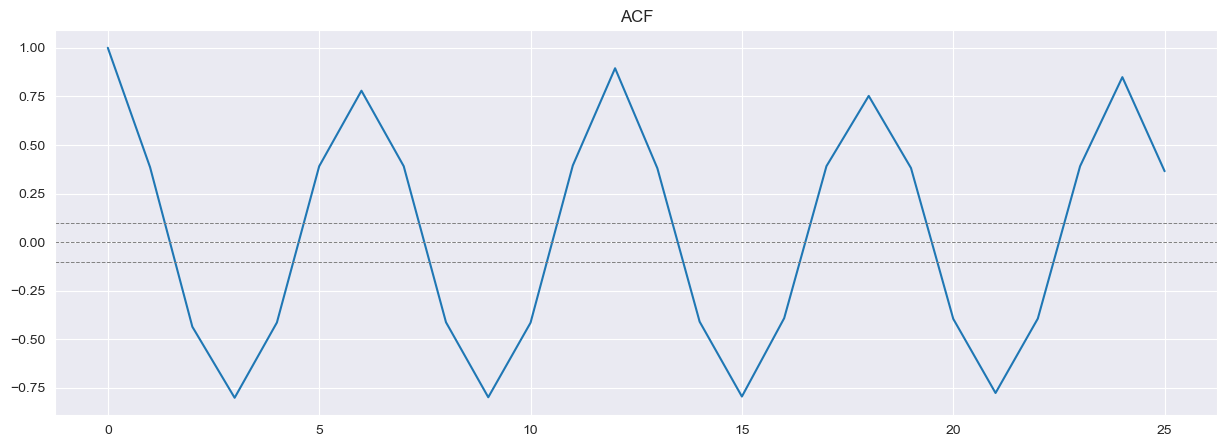

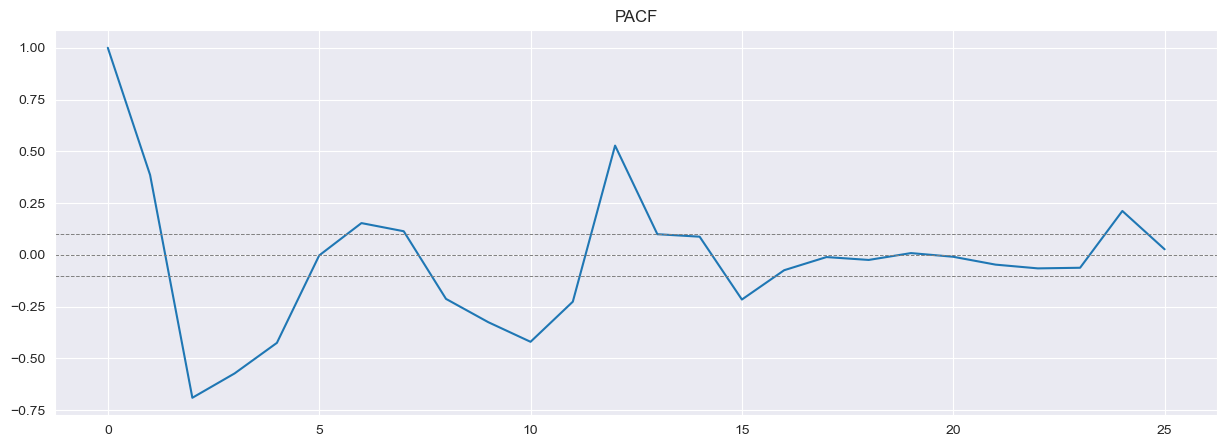

In [24]:
# intervalos de confiança ou testes estatísticos

y1 = -1.96/(np.sqrt((len(df_diff)-1)))
y2 = 1.96/(np.sqrt((len(df_diff)-1)))

# Usar ACF no X --> A(x,y,z)
plt.figure(figsize=(15,5))
plt.plot(lag_acf)
plt.axhline(y = y1 , linestyle = "--", color = "gray", linewidth = 0.7)
plt.axhline(y = 0 , linestyle = "--", color = "gray", linewidth = 0.7)
plt.axhline(y = y2 , linestyle = "--", color = "gray", linewidth = 0.7)
plt.title("ACF")
plt.show()

# Usar PACF no Y --> A(x,y,z)
plt.figure(figsize=(15,5))
plt.plot(lag_pacf)
plt.axhline(y = y1 , linestyle = "--", color = "gray", linewidth = 0.7)
plt.axhline(y = 0 , linestyle = "--", color = "gray", linewidth = 0.7)
plt.axhline(y = y2 , linestyle = "--", color = "gray", linewidth = 0.7)
plt.title("PACF")
plt.show()


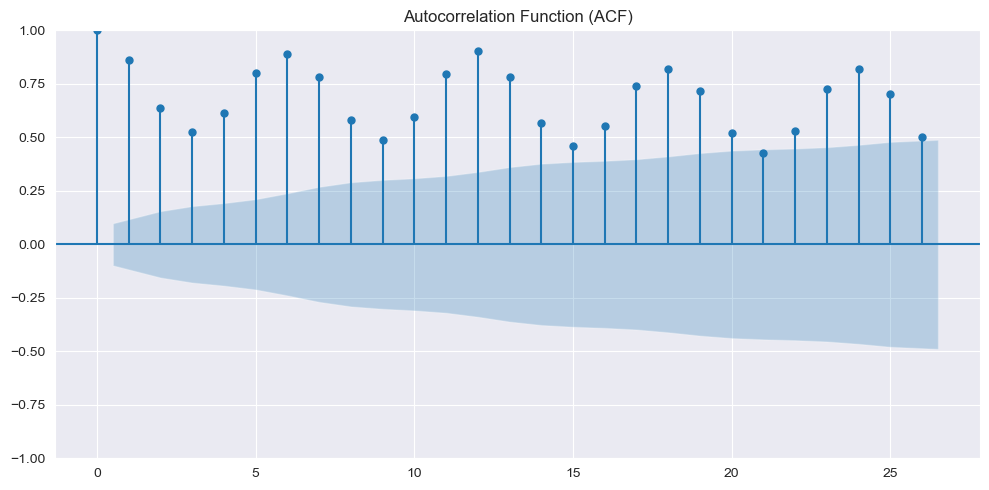

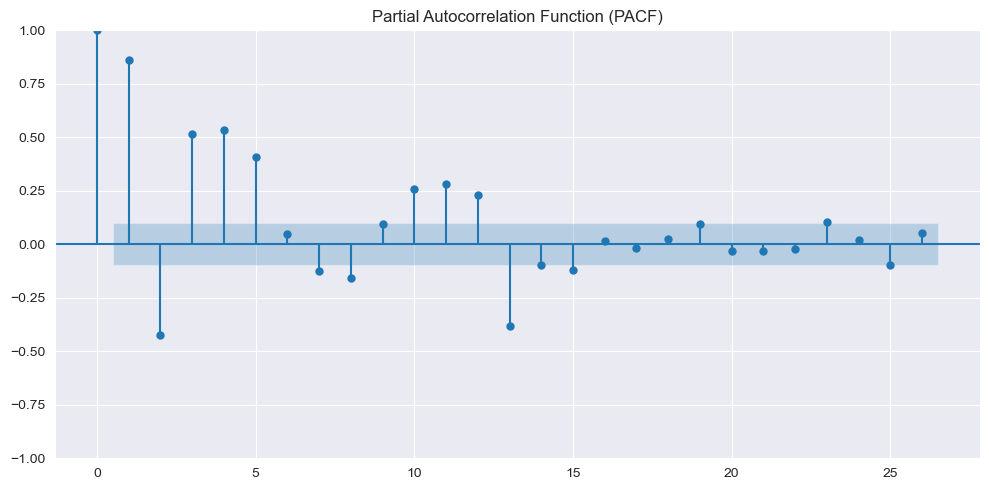

In [25]:
# ACF mostra como um periodo esta correlacionada com o outro
fig_acf, ax_acf = plt.subplots(figsize=(10, 5))
plot_acf(df.Value, ax=ax_acf)
plt.title('Autocorrelation Function (ACF)')
plt.tight_layout()
plt.show()

# PACF
fig_pacf, ax_pacf = plt.subplots(figsize=(10, 5))
plot_pacf(df.Value, ax=ax_pacf)
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()


#### Aula 5 - Modelando e Realizando o Forecasting

In [26]:
# Arquivo train.csv disponivel no link:
# https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data?select=train.csv

# index_col --> Definir qual coluna será o index
# parse_dates --> Transformar em data 

caminho = r"C:\Users\00262953\OneDrive - CERVEJARIA PETROPOLIS SA\Área de Trabalho\FIAP\train.csv"
df_novo = pd.read_csv(caminho, index_col="id", parse_dates=["date"])

In [27]:
df_novo.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [28]:
df_novo.tail()

,date,store_nbr,family,sales,onpromotion
id,,,,,
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,2017-08-15,9,SEAFOOD,16.000,0


In [29]:
# Ver coluna indice
df_novo.index


Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
       3000878, 3000879, 3000880, 3000881, 3000882, 3000883, 3000884, 3000885,
       3000886, 3000887],
      dtype='int64', name='id', length=3000888)

In [30]:
# Ver info do data frame
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 137.4+ MB


In [31]:
# Ver qtd de lojas unicas
df_novo["store_nbr"].nunique()

54

In [32]:
# Pegar dados da loja 1 
df_1 = df_novo.loc[df_novo["store_nbr"]==1, ["date", "family", "sales"]]
df_1 = df_1.rename(columns={"date" : "ds", "sales" : "y", "family" : "unique_id"})

In [33]:
# Consultar novo data frame
df_1.head()

,ds,unique_id,y
id,,,
0,2013-01-01,AUTOMOTIVE,0.0
1,2013-01-01,BABY CARE,0.0
2,2013-01-01,BEAUTY,0.0
3,2013-01-01,BEVERAGES,0.0
4,2013-01-01,BOOKS,0.0


In [34]:
# Ver qtd de linhas e colunas
df_1.shape

(55572, 3)

In [35]:
# Separar os dados
treino = df_1.loc[df_1["ds"] < "2014-01-01"]
valid = df_1.loc[(df_1["ds"] >= "2014-01-01") & (df_1["ds"] < "2014-04-01")]
h = valid["ds"].nunique()

In [36]:
h

90

In [37]:
valid.head()

,ds,unique_id,y
id,,,
648648,2014-01-01,AUTOMOTIVE,0.0
648649,2014-01-01,BABY CARE,0.0
648650,2014-01-01,BEAUTY,0.0
648651,2014-01-01,BEVERAGES,0.0
648652,2014-01-01,BOOKS,0.0
